In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.metrics import r2_score
import scipy.sparse
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train['date'] = pd.to_datetime(train['date'], errors='coerce')
train['year'] = train['date'].dt.year
train['year'].replace({2013:1,2014:2,2015:3,2016:4,2017:5},inplace=True)
train['month'] = train['date'].dt.month
train['dayofweek'] = train['date'].dt.dayofweek
train['weekofyear'] = train['date'].dt.weekofyear

In [3]:
train.head()

,date,store,item,sales,year,month,dayofweek,weekofyear
0,2013-01-01,1,1,13,1,1,1,1
1,2013-01-02,1,1,11,1,1,2,1
2,2013-01-03,1,1,14,1,1,3,1
3,2013-01-04,1,1,13,1,1,4,1
4,2013-01-05,1,1,10,1,1,5,1


In [4]:
def SMAPE(test_y,pred_y):
    print(100/len(test_y)*np.sum(2*np.abs(test_y-pred_y)/(np.abs(test_y) + np.abs(pred_y))))

In [5]:
#一個一個商品跑
def spe_item_predict(clf,train):
    pred_total = np.zeros([0,0])
    test_total = np.zeros([0,0])
    for i in range(1,51):
        train_X = train[(train['item']==i)&(train['year']<5)].drop(columns=['sales','date'])
        train_y = train[(train['item']==i)&(train['year']<5)]['sales']
        test_X = train[(train['item']==i)&(train['year']==5)&(train['month']<=3)].drop(columns=['sales','date'])
        test_y = train[(train['item']==i)&(train['year']==5)&(train['month']<=3)]['sales'].to_numpy()
        train_X = pd.get_dummies(train_X,columns = ['store'])
        test_X = pd.get_dummies(test_X,columns = ['store'])
        clf.fit(train_X, train_y)
        pred_y = clf.predict(test_X)
        pred_total = np.append(pred_total,pred_y)
        test_total = np.append(test_total,test_y)
    print(r2_score(test_total,pred_total))
    SMAPE(test_y,pred_y)

In [6]:
#一間一間商店跑
def spe_store_predict(clf,train):
    pred_total = np.zeros([0,0])
    test_total = np.zeros([0,0])
    for i in range(1,11):
        train_X = train[(train['store']==i)&(train['year']<5)].drop(columns=['sales','date'])
        train_y = train[(train['store']==i)&(train['year']<5)]['sales']
        test_X = train[(train['store']==i)&(train['year']==5)&(train['month']<=3)].drop(columns=['sales','date'])
        test_y = train[(train['store']==i)&(train['year']==5)&(train['month']<=3)]['sales'].to_numpy()
        train_X = pd.get_dummies(train_X,columns = ['item'])
        test_X = pd.get_dummies(test_X,columns = ['item'])
        clf.fit(train_X, train_y)
        pred_y = clf.predict(test_X)
        pred_total = np.append(pred_total,pred_y)
        test_total = np.append(test_total,test_y)
    print(r2_score(test_total,pred_total))
    SMAPE(test_y,pred_y)

In [7]:
#一個一個商品跑三個月
def spe_item_predict_3month(clf,train):
    pred_total = np.zeros([0,0])
    test_total = np.zeros([0,0])
    for i in range(1,51):
        train_X = train[(train['item']==i)&(train['year']<5)&(train['month']<=3)].drop(columns=['sales','date'])
        train_y = train[(train['item']==i)&(train['year']<5)&(train['month']<=3)]['sales']
        test_X = train[(train['item']==i)&(train['year']==5)&(train['month']<=3)].drop(columns=['sales','date'])
        test_y = train[(train['item']==i)&(train['year']==5)&(train['month']<=3)]['sales'].to_numpy()
        train_X = pd.get_dummies(train_X,columns = ['store'])
        test_X = pd.get_dummies(test_X,columns = ['store'])
        clf.fit(train_X, train_y)
        pred_y = clf.predict(test_X)
        pred_total = np.append(pred_total,pred_y)
        test_total = np.append(test_total,test_y)
    print(r2_score(test_total,pred_total))
    SMAPE(test_y,pred_y)

In [54]:
#全部分開跑
def spe_all_predict(clf,train):
    pred_total = np.zeros([0,0])
    test_total = np.zeros([0,0])
    for i in range(1,51):
        for j in range(1,11):
            train_X = train[(train['item']==i)&(train['year']<5)&(train['store']==j)].drop(columns=['sales','date'])
            train_y = train[(train['item']==i)&(train['year']<5)&(train['store']==j)]['sales']
            test_X = train[(train['item']==i)&(train['year']==5)&(train['store']==j)&(train['month']<=3)].drop(columns=['sales','date'])
            test_y = train[(train['item']==i)&(train['year']==5)&(train['store']==j)&(train['month']<=3)]['sales'].to_numpy()
            clf.fit(train_X, train_y)
            pred_y = clf.predict(test_X)
            pred_total = np.append(pred_total,pred_y)
            test_total = np.append(test_total,test_y)
    print(r2_score(test_total,pred_total))
    SMAPE(test_y,pred_y)

In [55]:
#全部分開跑三個月
def spe_all_predict_3month(clf,train):
    pred_total = np.zeros([0,0])
    test_total = np.zeros([0,0])
    for i in range(1,51):
        for j in range(1,11):
            train_X = train[(train['item']==i)&(train['year']<5)&(train['store']==j)&(train['month']<=3)].drop(columns=['sales','date'])
            train_y = train[(train['item']==i)&(train['year']<5)&(train['store']==j)&(train['month']<=3)]['sales']
            test_X = train[(train['item']==i)&(train['year']==5)&(train['store']==j)&(train['month']<=3)].drop(columns=['sales','date'])
            test_y = train[(train['item']==i)&(train['year']==5)&(train['store']==j)&(train['month']<=3)]['sales'].to_numpy()
            clf.fit(train_X, train_y)
            pred_y = clf.predict(test_X)
            pred_total = np.append(pred_total,pred_y)
            test_total = np.append(test_total,test_y)
    print(r2_score(test_total,pred_total))
    SMAPE(test_y,pred_y)

In [35]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100,random_state=123,n_jobs=-1)
spe_item_predict(clf,train)
spe_store_predict(clf,train)
spe_item_predict_3month(clf,train)
spe_all_predict(clf,train)
spe_all_predict_3month(clf,train)

0.8776771085885887
13.1073738619752
0.8766572485160229
15.078270072595602
0.8770637021417974
13.133569449038092
0.8763734217536469
11.552109399791005
0.8765325375828239
11.513197670845427


In [68]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=200,random_state=123,n_jobs=-1)
spe_all_predict_3month(clf,train)

0.8766405560983364
11.52198201147005


In [36]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
spe_item_predict(clf,train)
spe_store_predict(clf,train)
spe_item_predict_3month(clf,train)
spe_all_predict(clf,train)
spe_all_predict_3month(clf,train)

0.9104231960142101
10.812025996203303
0.7540902004125197
22.536590585132142
0.9028888259147339
11.074109481105774
0.9063616101561603
9.88423876668397
0.8994247855778825
9.666831684017676


In [66]:
#調參
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(random_state=123,n_estimators=200,learning_rate=0.05)
spe_all_predict_3month(clf,train)

0.8994790089282715
9.567841979896688


In [37]:
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor()
spe_item_predict(clf,train)
#spe_store_predict(clf,train)
spe_item_predict_3month(clf,train)
spe_all_predict(clf,train)
spe_all_predict_3month(clf,train)

0.8048322699868169
18.620225170144582
0.8637220229206072
13.074162620104598
0.8884915527821493
9.962714285911098
0.8908999085748607
9.998927078389245


In [62]:
#調參
from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor(random_state=123,n_estimators=200,learning_rate=0.85)
spe_all_predict_3month(clf,train)

0.891385715224135
9.416389988274236


In [38]:
from sklearn.ensemble import BaggingRegressor
clf = BaggingRegressor()
spe_item_predict(clf,train)
#spe_store_predict(clf,train)
spe_item_predict_3month(clf,train)
spe_all_predict(clf,train)
spe_all_predict_3month(clf,train)

0.8731624135011108
13.348867629452274
0.8724309082145107
15.41747869256646
0.8723345422180687
13.277820449688079
0.8723278027308313
11.648363366570878
0.8719089143881753
11.531505138149571


In [40]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor()
spe_item_predict(clf,train)
#spe_store_predict(clf,train)
spe_item_predict_3month(clf,train)
spe_all_predict(clf,train)
spe_all_predict_3month(clf,train)

0.8801955539730147
12.391810598818509
0.8810530355269324
12.270389140459237
0.8923528136551404
10.116400452319656
0.8916063717940722
9.973709395640181


In [13]:
#調參
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(weights='distance')
spe_all_predict_3month(clf,train)

0.8922860409734525
9.881724719366435


In [20]:
from sklearn.linear_model import ElasticNet,Lasso,Ridge

In [21]:
clf = ElasticNet()
spe_item_predict(clf,train)
spe_item_predict_3month(clf,train)

0.6666723825199938
23.6313563399763
0.7376211541361728
19.695854013802563


In [22]:
clf = Lasso()
spe_item_predict(clf,train)
spe_item_predict_3month(clf,train)

0.7189102903749378
21.781734108194215
0.7845332722162611
17.85640671863984


In [31]:
clf = Ridge()
spe_item_predict(clf,train)
spe_item_predict_3month(clf,train)
spe_all_predict_3month(clf,train)

0.7945428990018273
18.620387761981014
0.897310182222301
11.713666578395841
0.9040357499932841
10.091666343947425


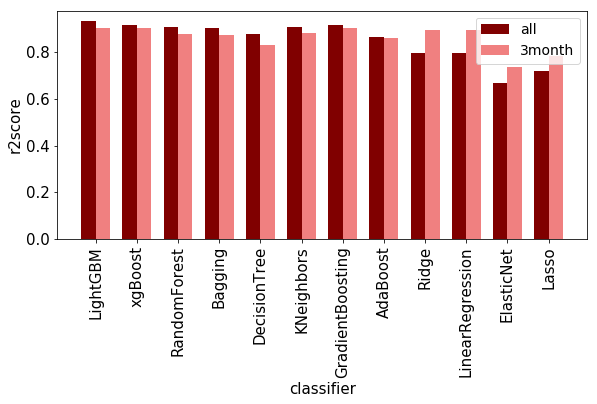

In [33]:
#在分商店跑下，全年和三個月的比較
score_all = [0.932,0.917,0.909,0.905,0.877,0.91,0.917,0.865,0.795,0.795,0.667,0.719]
score_3 = [0.906,0.903,0.877,0.872,0.833,0.881,0.903,0.863,0.897,0.897,0.738,0.785]
clf = ['LightGBM','xgBoost','RandomForest','Bagging','DecisionTree','KNeighbors','GradientBoosting','AdaBoost',
      'Ridge','LinearRegression','ElasticNet','Lasso']
plt.figure(figsize=(9.5,4.2))
plt.bar(clf,score_all,label='all',align="edge",width = -0.35,fc='maroon')
plt.bar(clf,score_3,label='3month',align="edge",width = 0.35,fc='lightcoral')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("classifier",fontsize=15)
plt.ylabel("r2score",fontsize=15)
plt.legend(fontsize=14)

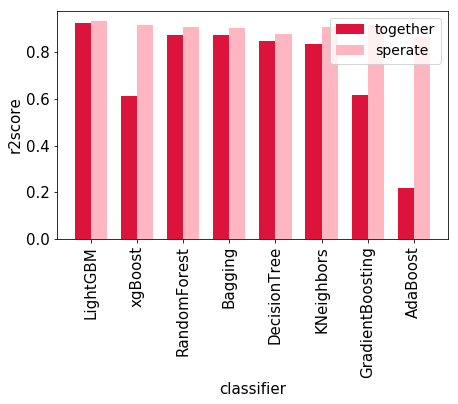

In [31]:
#全年分開跑或一起跑
score_toge = [0.925,0.613,0.873,0.872,0.849,0.834,0.616,0.218]
score_spe = [0.932,0.917,0.909,0.905,0.877,0.91,0.917,0.865]
clf = ['LightGBM','xgBoost','RandomForest','Bagging','DecisionTree','KNeighbors','GradientBoosting','AdaBoost']
plt.figure(figsize=(7,4.2))
plt.bar(clf,score_toge,label='together',align="edge",width = -0.35,fc='crimson')
plt.bar(clf,score_spe,label='sperate',align="edge",width = 0.35,fc='lightpink')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("classifier",fontsize=15)
plt.ylabel("r2score",fontsize=15)
plt.legend(fontsize=14)

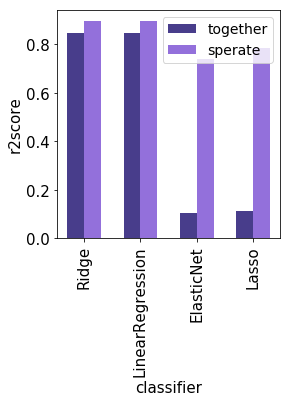

In [32]:
#三個月分開跑或一起跑
score_toge = [0.846,0.8461,0.103,0.1130]
score_spe = [0.897,0.897,0.738,0.785]
clf = ['Ridge','LinearRegression','ElasticNet','Lasso']
plt.figure(figsize=(4,4.2))
plt.bar(clf,score_toge,label='together',align="edge",width = -0.3,fc='darkslateblue')
plt.bar(clf,score_spe,label='sperate',align="edge",width = 0.3,fc='mediumpurple')
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("classifier",fontsize=15)
plt.ylabel("r2score",fontsize=15)
plt.legend(fontsize=14)